In [ ]:
import pandas as pd
import numpy as np
import sklearn 


## Load dataset

In [ ]:
raw_dataset=pd.read_csv('./drive/MyDrive/ml_project/heart_2020.csv')
# raw_dataset.shape

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# raw_dataset.head()
# raw_dataset.sample()
# raw_dataset.isnull().sum()


## Pre-process dataset-null value handling 

In [ ]:
#null value handling
raw_dataset=raw_dataset.dropna(axis=0,subset=['Sex'])
raw_dataset.shape

(49985, 18)

In [ ]:
# raw_dataset.describe()


In [ ]:
# raw_dataset.columns

## -categorical value encoding 

In [ ]:
# Encoding
numeric_features=['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
categorical_features=['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth','Asthma', 'KidneyDisease', 'SkinCancer']
# 
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(raw_dataset[categorical_features])
raw_dataset[categorical_features] = enc.transform(raw_dataset[categorical_features])

In [ ]:
# raw_dataset

## Dataset splitting

In [ ]:
# Training Testing
y=raw_dataset[['HeartDisease']]
x=raw_dataset[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth','Asthma', 'KidneyDisease', 'SkinCancer']]
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
# x_train.shape
# y_train.shape

## Feature scaling

In [ ]:
# feature scaling

from sklearn.preprocessing import  MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)

# transform
X_train_scaled=scaler.transform(X_train)

X_test_scaled=scaler.transform(X_test)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from xgboost import XGBClassifier




## Dataset training
## &
## Dataset testing

In [ ]:

models = [KNeighborsClassifier(), LogisticRegression(), XGBClassifier()]
accuracy=[]
for model in models:
  model.fit(X_train_scaled,y_train)
  y_pred=model.predict(X_test_scaled)
  score=accuracy_score(y_test,y_pred)*100
  accuracy.append(score)
  print(str(model))
  print(f'Accuracy_score: {score}%')
  print(confusion_matrix(y_test,y_pred))
error=[]
for i in accuracy:
  error.append(100-i)


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()
Accuracy_score: 90.41369928782908%


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()
Accuracy_score: 91.23789709530288%


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier()
Accuracy_score: 91.28590861806833%


9. Comparison analysis between multiple models (accuracy score, error rate etc.) using bar plot

In [ ]:
import matplotlib.pyplot as plt
models=['KNeighborsClassifier','LogisticRegression','XGBClassifier']
xpos=np.arange(len(models))

# ypos


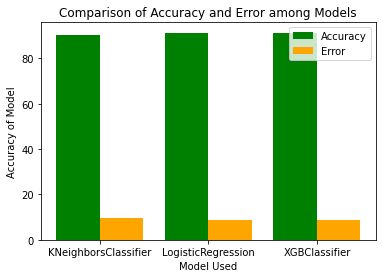

In [ ]:
plt.xticks(xpos,models)
plt.title('Comparison of Accuracy and Error among Models')
plt.xlabel('Model Used')

plt.ylabel('Accuracy of Model')

plt.bar(xpos-.2,accuracy,width=0.4,color='green',label='Accuracy')

plt.bar(xpos+.2,error,width=.4,color='orange',label='Error')

plt.legend()